In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
txt = pd.read_csv(r'C:\Users\HP\Desktop\data science doc\1.03.+Dummies(1).csv')

In [3]:
txt.head(20)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [4]:
txt.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
new = txt.copy()

In [6]:
new['Attendance'] = new['Attendance'].map({'Yes':1, 'No': 0})

In [7]:
new

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [8]:
y =new['GPA']
x1 =new[['SAT', 'Attendance']]

In [9]:
x =sm.add_constant(x1)

In [10]:
result= sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           2.19e-15
Time:                        00:54:29   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

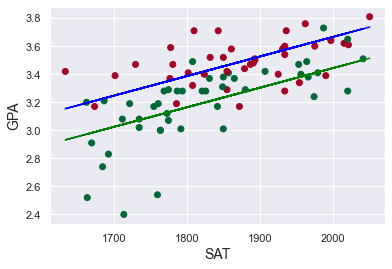

In [11]:
plt.scatter(new['SAT'],y, c =new['Attendance'], cmap ='RdYlGn_r')
y_dep_yes = 0.8665 + 0.0014*new['SAT']
y_dep_no = 0.6439 + 0.0014*new['SAT']
plt.plot (new['SAT'],y_dep_yes, lw = 1.5, c= 'blue', label ='regressive line')
plt.plot(new['SAT'], y_dep_no, lw=1.5, c= 'green', label ='regressive line1')
plt.xlabel('SAT', fontsize = 14)
plt.ylabel('GPA', fontsize = 14)
plt.show()

In [12]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [13]:
new_data = pd.DataFrame({'const':1, 'SAT': [1700,1670], 'Attendance':[1,0]})


In [14]:
new_data

,const,SAT,Attendance
0,1,1700,1
1,1,1670,0


In [15]:
new_data = new_data.rename(index={0: 'Tolu', 1:'Binpe'})

In [16]:
new_data

,const,SAT,Attendance
Tolu,1,1700,1
Binpe,1,1670,0


In [17]:
prediction = result.predict(new_data)

In [18]:
prediction

Tolu     3.246157
Binpe    2.981519
dtype: float64

In [19]:
predictiondf =pd.DataFrame({'Prediction': prediction})


In [21]:
predictiondf
join = new_data.join(predictiondf)

In [22]:
join

,const,SAT,Attendance,Prediction
Tolu,1,1700,1,3.246157
Binpe,1,1670,0,2.981519
